(app:diodes)=
# Chapter 6 - Diodes
This notebook will lead you through plotting and fitting your diode data. Please read the instructions carefully as you go. The methods used here are a bit more complicated than other experiments. The cell below will load important libraries for doing the analysis. A new library is being imported called `pandas`. This library allows us to read Excel files. It will automatically create arrays in a structure called a dataframe. This will be very handy since we have several experiments that have lots of measurements. Shift-Enter the code cell below to import the necessary libraries.

In [1]:
# import modules
import pandas as pd
import numpy as np
#from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Matplotlib is building the font cache; this may take a moment.


## Create Excel File of Data
Enter your data in Excel in separate sheets. The sheet names should be "zener" and "silicon". In each sheet, make columns "Vo", "VR", "Vd", and "I". The Excel sheets will look like the table below. The numbers below are only an example. You will set $V_o$ on the DC power supply. Then, you will measure $V_R$. Next, you will calculate $V_d = V_o-V_R$  and $I=V_R/R$ in Excel. 

| Vo |  VR | Vd  |  I   |
|:--:|:---:|:---:|:----:|
|-5.0| 0.80| 4.2 |-0.008|
| ...| ... | ... |  ... |
| 1.0| 0.23| 0.77|0.0023|

Save two Excel files as comma separated values (.csv). The files are zener.csv and silicon.csv. Upload these files to your online Jupyter platform. Ask your TA or instructor if you need assistance. 

## Read Your File with Pandas
The code below will load your Excel file, but the location of the file may need to be adjusted depending on which Jupyter platform you are using (Google Colab, JupyteLite, etc.). It will print the first few lines of the zener dataframe and plot your zener diode data as a check that everything is functioning as expected.

Pandas will load your data into what is called a dataframe. We designate this when we load by calling our dataframes `zener_df` and `silicon_df`.  The columns in the dataframe are your columns from Excel, and they can be referenced by the names you gave them in Excel. For example, in the plotting below, you can see that the zener diode data is referenced by `zener_df['Vd']` and `zener_df['I']`. These are the diode voltage and current, respectively.

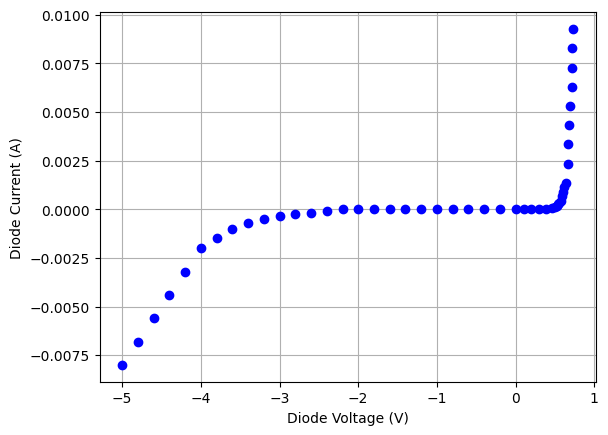

,Vo,VR,Vd,I
0,-5.0,0.0,-5.0,-0.0080
1,-4.8,0.0,-4.8,-0.0068
2,-4.6,0.0,-4.6,-0.0056
3,-4.4,0.0,-4.4,-0.0044
4,-4.2,0.0,-4.2,-0.0032


In [10]:
#read Excel files with pandas
zener_df = pd.read_csv('zener.csv')
silicon_df = pd.read_csv('silicon.csv')

#plot the zener data
plt.plot(zener_df['Vd'], zener_df['I'], 'bo')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.grid(True)
plt.savefig('zener.svg')
plt.show()

#print the first few lines
zener_df.head()

## Plot the zener and silicon data
The following code will plot your zener and silicon diode data together so that you can see the differences.

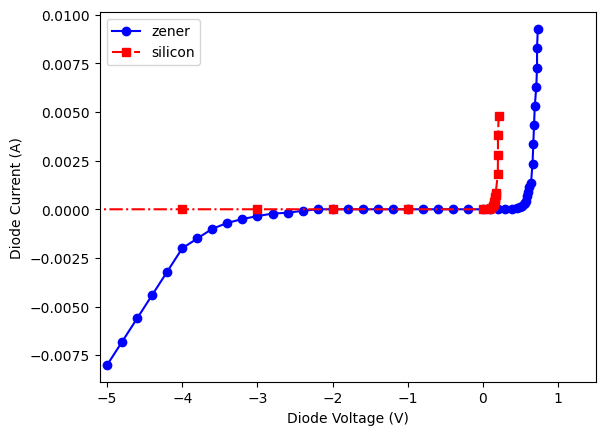

In [8]:
plt.plot(zener_df['Vd'], zener_df['I'], 'b-o', label='zener')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'r-.s', label='silicon')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.xlim(-5.1, 1.5)
plt.legend(loc=0)
plt.show()

## Estimating the Band Gap
We now want to fit a line to the highest voltage portion of the diode data. This region being linear, means the semiconductor has been given enough energy to become conducting. It follows Ohm's Law. If we project the linear fit backward across the x-axis, this voltage is the energy associated with the band gap. It is the "turn on" voltage of the diode when the bands become even.

In the code below, 
* The line function is defined.
* Initial guesses for the slope and intercept are given to help the fitting algorithm.
* Estimate the turn on voltage. You will want to adjust this so that the line fits **only** the linear portion at higher voltages.
* The linear fit is performed, and the results are printed.
* A plot of the fit results is shown and saved for you.

Zener Fit Parameters
slope = 0.0861387284883079 +/- 0.005481270137040574
intercept = -0.05422254346636313 +/- 0.003791553015089328
Silicon Fit Parameters
slope = 0.1489999999998267 +/- 0.08660253057049037
intercept = -0.026499999999965256 +/- 0.01761391298921591


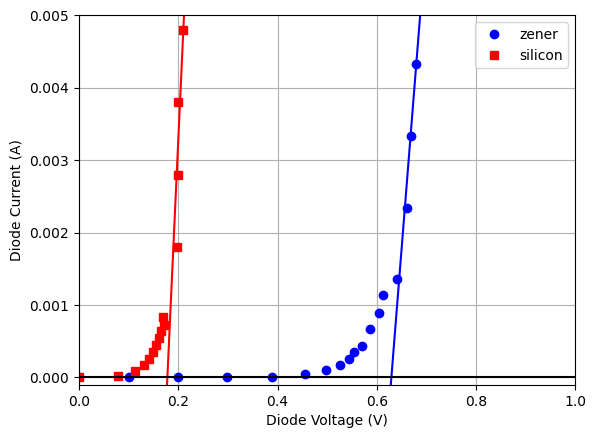

In [19]:
# curve_fit function
def f_line(x, m, b):
    return m*x + b

#initial guesses for the fit
m = 0.01
b = -1

#Get zener fit
turnon = 0.63 # approximate where the turn on voltage is for the zener
zener_parms, zener_pcov = curve_fit(f_line, zener_df['Vd'].loc[zener_df['Vd'] > turnon], zener_df['I'].loc[zener_df['Vd'] > turnon], (m,b))

#Get silicon fit
turnon = 0.199 # approximate where the turn on voltage is for silicon
silicon_parms, silicon_pcov = curve_fit(f_line, silicon_df['Vd'].loc[silicon_df['Vd'] > turnon], silicon_df['I'].loc[silicon_df['Vd'] > turnon], (m,b))

#Print fit params
print("Zener Fit Parameters")
print("slope =", zener_parms[0], "+/-", np.sqrt(zener_pcov[0][0]))
print("intercept =", zener_parms[1], "+/-", np.sqrt(zener_pcov[1][1]))
print("Silicon Fit Parameters")
print("slope =", silicon_parms[0], "+/-", np.sqrt(silicon_pcov[0][0]))
print("intercept =", silicon_parms[1], "+/-", np.sqrt(silicon_pcov[1][1]))

#Plot the results
xx = np.linspace(0,1, 200)
plt.plot(zener_df['Vd'], zener_df['I'], 'bo', label='zener')
plt.plot(xx, f_line(xx, *zener_parms), '-b')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'rs', label='silicon')
plt.plot(xx, f_line(xx, *silicon_parms), '-r')
plt.hlines(0, 1, 0, linestyle='solid', color='black')
plt.legend(loc=0)
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.0001,0.005)
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.savefig('diodeIVfit.svg')
plt.show()

### Turn on Voltage
The turn on voltage is the x-axis crossing or where y = 0. We can use the slopes and intercepts from the fit to determine these values.
```{math}
:label: app:eq:diodes:turnon
y = mx + b = 0\\
\\
x = -b/m
```

In the code cell below, the slopes and intercepts are set for you. Use these to calculate equation {eq}`app:eq:diodes:turnon`. The code will print the results for you.

In [20]:
zener_slope = zener_parms[0]
zener_intercept = zener_parms[1]

silicon_slope = silicon_parms[0]
silicon_intercept = silicon_parms[1]

zener_V_on = 
silicon_V_on = 

print("zener turn on = ", zener_V_on)
print("silicon turn on =", silicon_V_on)

0.6294792646460188 0.17785234899326227
